In [20]:
import time
from src.pgm import   PGM
%pylab inline

from src.data import get_factorized_dataset
from pomegranate import BayesianNetwork
import numpy as np
import seaborn
import matplotlib.pyplot as plt

seaborn.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [21]:
dataset = get_factorized_dataset().drop(['veil-type','stalk-root'],axis=1)

In [25]:
def analyze_data(data,epochs=20,algorithm='chow-liu'):
    pgm = PGM(data)
    tic = time.time()
    m = BayesianNetwork.from_samples(data,algorithm='chow-liu',state_names=data.columns)
    print("Time (s): ", time.time() - tic)

    pgm.import_pomegranate_model(m,data.columns)
    plt.figure(figsize=(15,10))
    m.plot()

    msk = np.random.rand(len(data)) < 0.8
    train_data = data[msk]
    test_data = data[~msk]

    pgm.fit(train_data,epochs=epochs)
    pgm.print_statistics(train_data,test_data)


Time (s):  1.3783478736877441


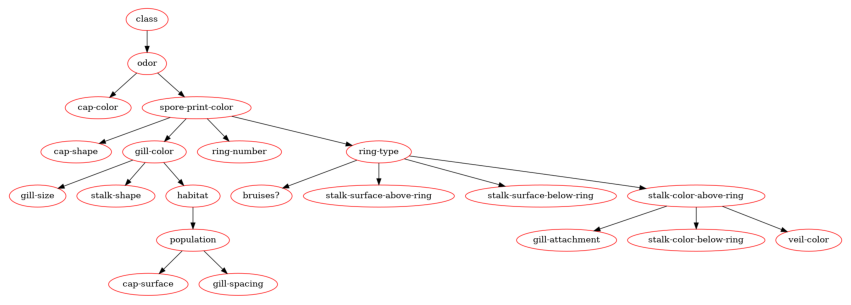

In [14]:
analyze_data(dataset)

Time (s):  1.1766483783721924
Loss = 191698.75
Loss = 169597.5
Loss = 151894.15625
Loss = 137994.09375
Loss = 127566.6171875
Loss = 117071.9453125
Loss = 112545.3125
Loss = 109430.1015625
Loss = 107325.3359375

train
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3132
           1       0.79      0.83      0.81      3406

    accuracy                           0.80      6538
   macro avg       0.80      0.80      0.80      6538
weighted avg       0.80      0.80      0.80      6538

test
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       784
           1       0.77      0.82      0.79       802

    accuracy                           0.79      1586
   macro avg       0.79      0.79      0.79      1586
weighted avg       0.79      0.79      0.79      1586



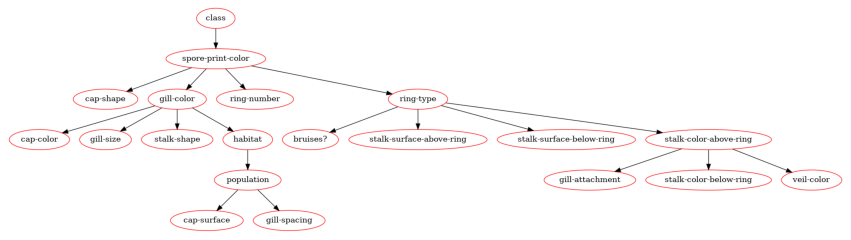

In [26]:
analyze_data(dataset.drop(['odor'],axis=1))
